In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv(r"C:\Users\guder\Salary\Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [8]:
df.shape

(6704, 6)

In [9]:
df.describe(include="all")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6702.000000,6702,6701,6702,6701.000000,6699.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3674,2267,518,NaN,NaN
mean,33.620859,NaN,NaN,NaN,8.094687,115326.964771
std,7.614633,NaN,NaN,NaN,6.059003,52786.183911
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


In [10]:
df[df.isnull().any(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [11]:
df=df.dropna()

In [12]:
df.shape

(6698, 6)

In [13]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [14]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [15]:
(df.isnull().sum() / len(df)) * 100


Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
dtype: float64

In [16]:
Q1=df['Salary'].quantile(0.25)
Q3=df['Salary'].quantile(0.75)

In [17]:
IQR= Q3 - Q1

In [18]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower) | (df['Salary'] > upper)]

In [19]:
df[outliers].sum()

Age                    0.0
Gender                   0
Education Level          0
Job Title                0
Years of Experience    0.0
Salary                 0.0
dtype: object

# **EDA**

In [20]:
# univariate analysis (Categorical features)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


<Axes: ylabel='count'>

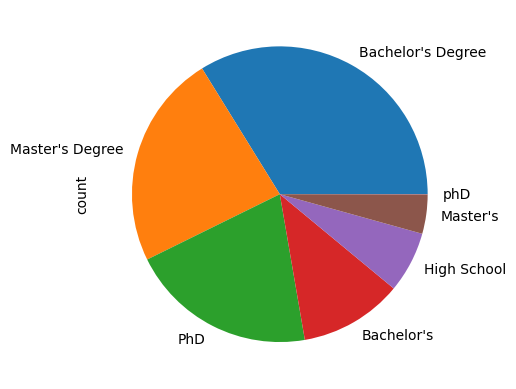

In [21]:
df['Education Level'].value_counts().plot(kind='pie')

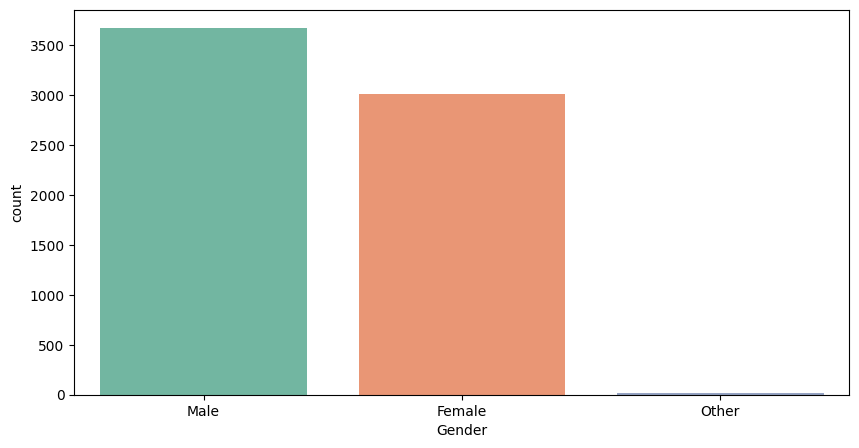

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender',hue='Gender',palette='Set2')
plt.show()

In [23]:
#Top 10 highest paying jobs

titles=df.groupby('Job Title')['Salary'].mean().nlargest(10)

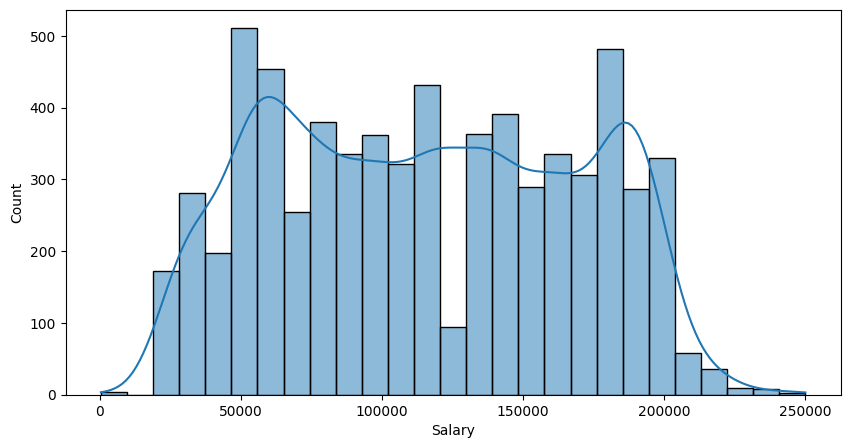

In [24]:
#univariate analysis (numerical data)
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'],kde=True)
plt.show()

People with salary range 40K have the highest frequency

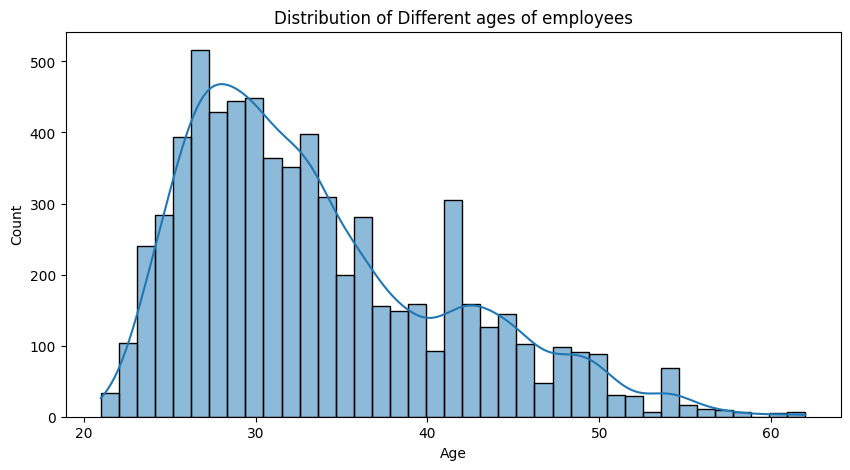

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',kde=True)
plt.title("Distribution of Different ages of employees")
plt.show()

Employees with age 28-29 range have high frequency and followed by 33-34 range age employees


In [26]:
df.columns = df.columns.str.strip()
df['Joined_year']=2025-df['Years of Experience']

In [27]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Joined_year
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2020.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2022.0
2,45.0,Male,PhD,Others,15.0,150000.0,2010.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,2018.0
4,52.0,Male,Master's,Others,20.0,200000.0,2005.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,2023.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0,2013.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,2021.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,2024.0
9,38.0,Male,PhD,Others,10.0,110000.0,2015.0


In [28]:
df['Joined_year']=df['Joined_year'].astype(int)

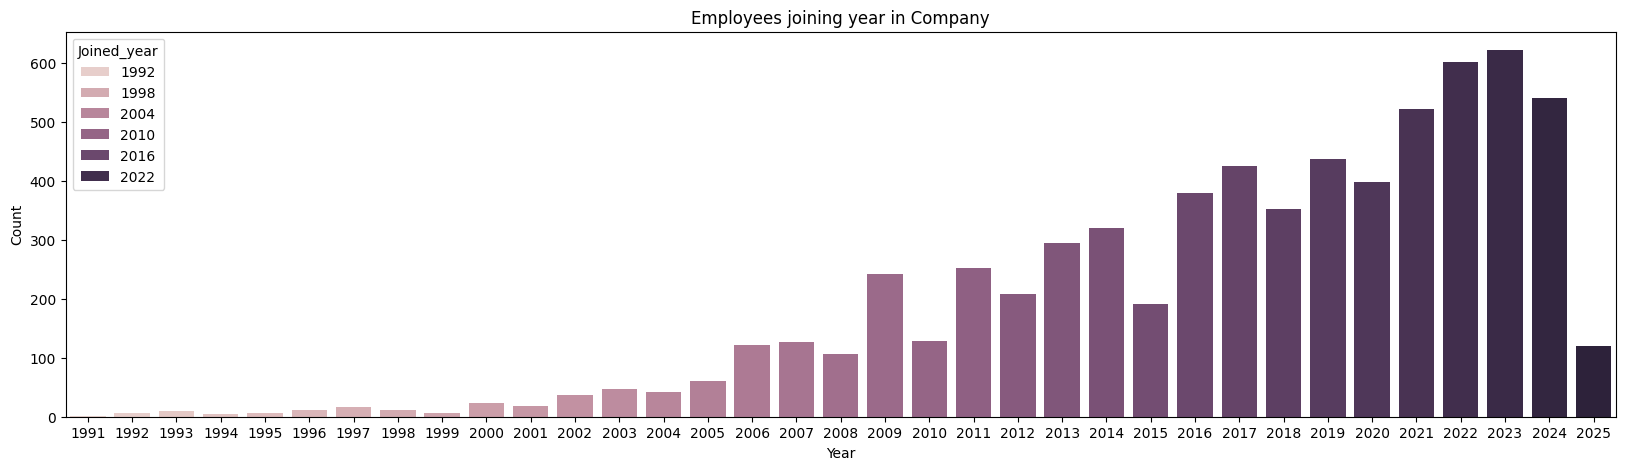

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='Joined_year',hue='Joined_year')
plt.title("Employees joining year in Company")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

1.In year 2023 and 2022 more number of employees are intaken into company

In [30]:
#bivaraiate analysis(categorical data)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Joined_year          6698 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 418.6+ KB


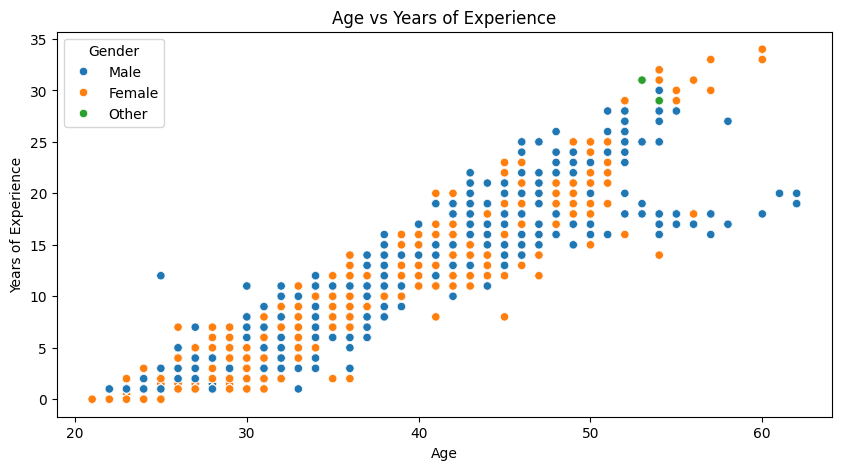

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Age',y='Years of Experience',hue='Gender')
plt.xlabel("Age")
plt.ylabel("Years of Experience")
plt.title("Age vs Years of Experience")
plt.show()

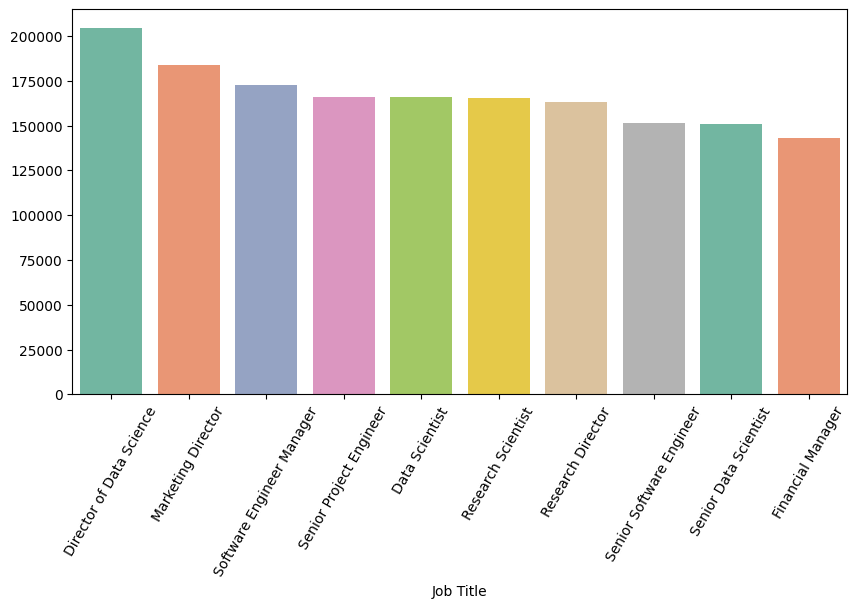

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=titles.index,y=titles.values,palette='Set2')
plt.xticks(rotation=60)
plt.show()

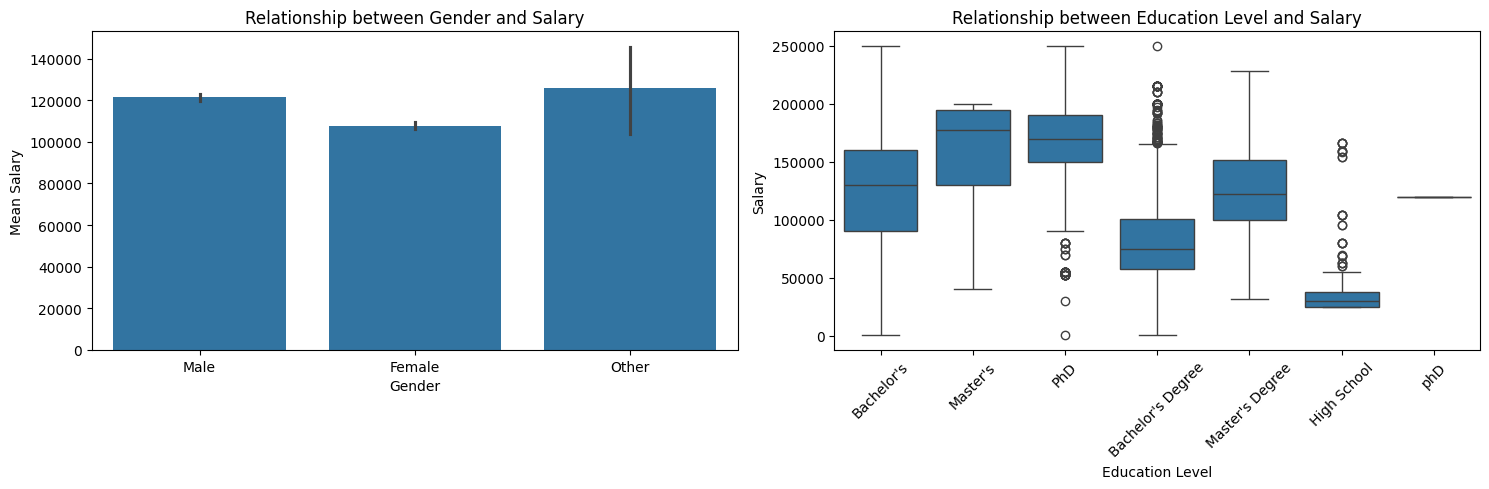

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Joined_year'>

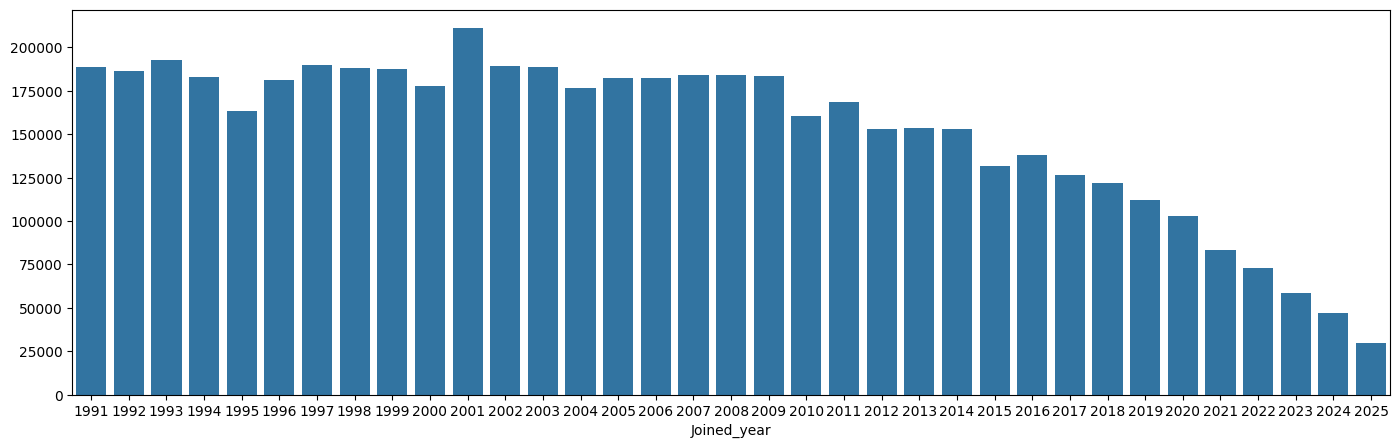

In [34]:
# total Salaries of employees who joined particular year

year_salaries = df.groupby('Joined_year')['Salary'].mean()
plt.figure(figsize=(17, 5))
sns.barplot(x=year_salaries.index, y=year_salaries.values)

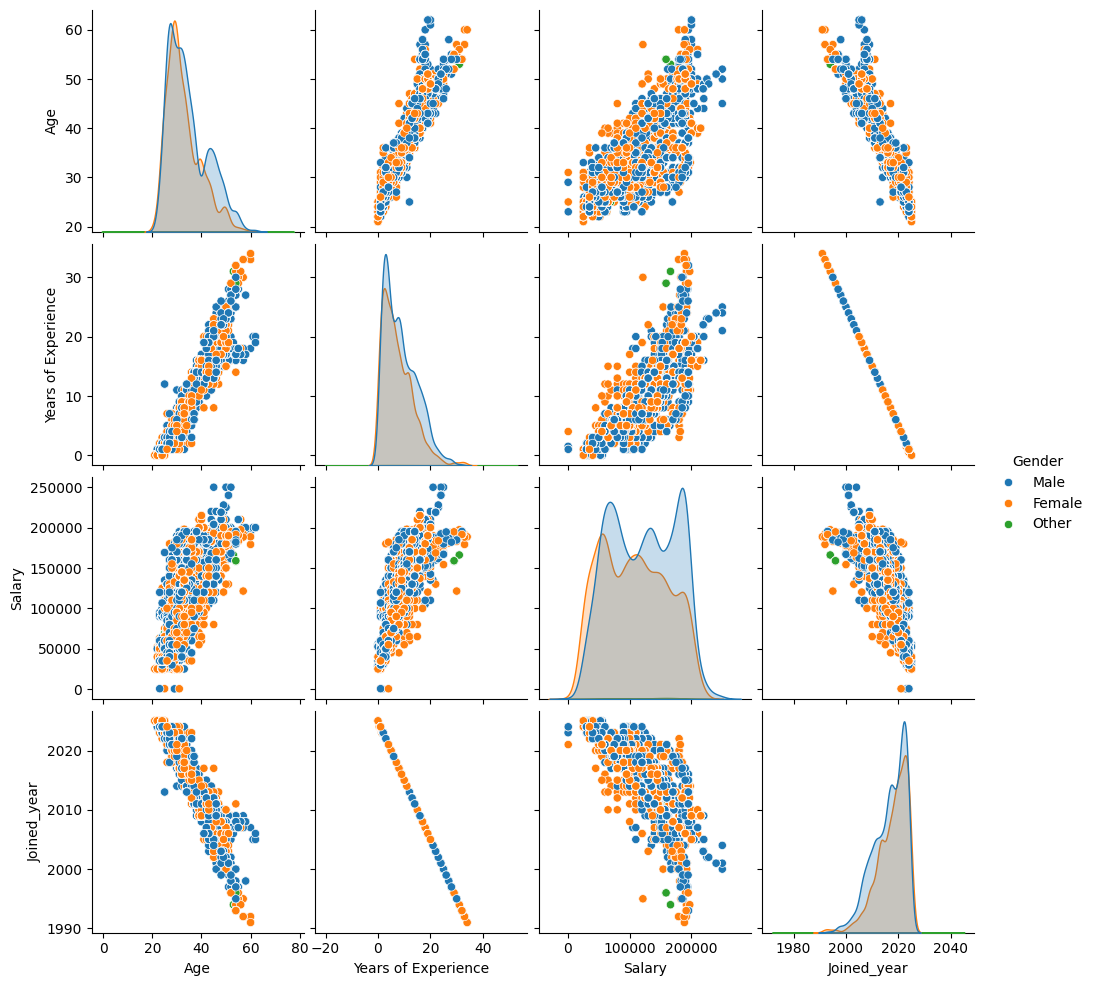

In [35]:

sns.pairplot(df,hue='Gender')

Conclusion from pair plot:
1. The age and year of experience are highly correlated with salary
2. There is negative corelation between salary vs age because the people who are joined eaarlier have more salary,employees who joined recently have less salary because less years of expeirence

In [36]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [37]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [38]:
# converting gender into 0 and 1 values
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

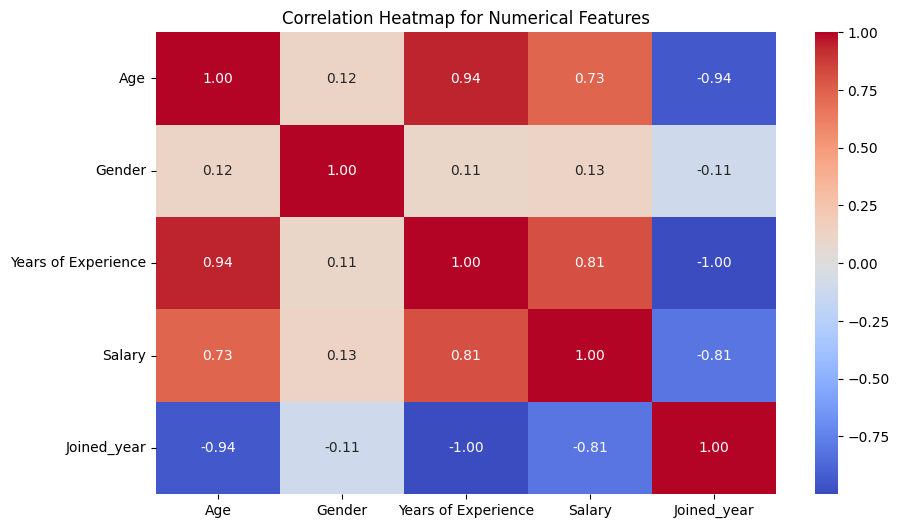

In [39]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

1.From heatmap there is positive corelation between age salary and years of experience

2.There is positive corelation between salary and age
3. The highest corelation is betweeen years of experience and age

# Data Transformation

In [40]:

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [41]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Joined_year,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,Bachelor's,5.0,90000.0,2020,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,Master's,3.0,65000.0,2022,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,PhD,15.0,150000.0,2010,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,Bachelor's,7.0,60000.0,2018,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,Master's,20.0,200000.0,2005,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# Mapping Education Level column
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


# Model Selection

In [43]:

features = df.drop('Salary',axis=1)

target = df['Salary']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
x_train.shape

(4688, 54)

In [45]:
rf = RandomForestRegressor(random_state=42)


In [46]:
from xgboost import XGBRegressor, plot_importance

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


# Model Tuning

In [47]:
param_grid = {

    'max_depth': [20,30,40,50,60,90],

    # Increase the minimum number of samples per leaf to prevent trees
    # from creating single-sample leaf nodes.
    'min_samples_leaf': [2,5,9],

    # Increase the minimum number of samples required to split a node.
    'min_samples_split': [2,5,7],

    # A wider range for n_estimators can still be helpful.
    'n_estimators': [100, 278,450,600],

    # 'sqrt' is often the best choice for this.
    'max_features': ['sqrt'],

    # Keep bootstrapping as it's a key part of Random Forest's ability to reduce variance.
    'bootstrap': [True]
}


In [48]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


In [49]:
random_search.fit(x_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True], 'max_depth': [20, 30, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 5, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [50]:
best_rf = random_search.best_estimator_

In [51]:
# xgboost regressor parameters

param_grid = {
    
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0, 0.1, 0.4],
    'reg_lambda': [1, 1.5, 2]
}


In [52]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [53]:
#xg boost
random_search.fit(x_train, y_train)


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.9], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5, ...], 'n_estimators': [300, 500, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


# Model evaluation

In [54]:
y_pred_train = best_rf.predict(x_train)
y_pred_test = best_rf.predict(x_test)

# 11. Evaluate performance
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"RMSE: {rmse}")

Train R²: 0.9735167974372825
Test R²: 0.960282960640635
RMSE: 10618.394939422567


In [55]:
print(r2_score(y_train, y_pred_train)-r2_score(y_test, y_pred_test))

0.013233836796647469


In [56]:
best_xgb = random_search.best_estimator_

# 10. Predictions
y_pred_train = best_xgb.predict(x_train)
y_pred_test = best_xgb.predict(x_test)

# 11. Evaluation
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"RMSE: {rmse}")

Train R²: 0.9894282717490342
Test R²: 0.9719473222499968
RMSE: 8923.959737678108


In [57]:
print(r2_score(y_train, y_pred_train)-r2_score(y_test, y_pred_test))

0.017480949499037446


In [58]:

import joblib
joblib.dump( best_xgb , "final_xgb_model.pkl")


['final_xgb_model.pkl']